In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

import bespoke_functions as f

In [2]:
df = pd.read_csv("datafiles/SpotifyFeatures.csv")
df = df.drop_duplicates(subset = "track_id")
df = df.reset_index(drop = True)

In [3]:
df.head(3)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910               0.0  C#     0.346    -1.828  Major   
1       137373   0.737               0.0  F#     0.151    -5.559  Minor   
2       170267   0.131               0.0   C     0.103   -13.879  Minor   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368

In [4]:
# bit of a shame that we had to drop artist name, though perhaps it's a blessing as you wouldn't want a recommender to just 
# recommend the rest of an album
df_dropped = df.drop(["track_name", "artist_name", "track_id"], axis = 1)

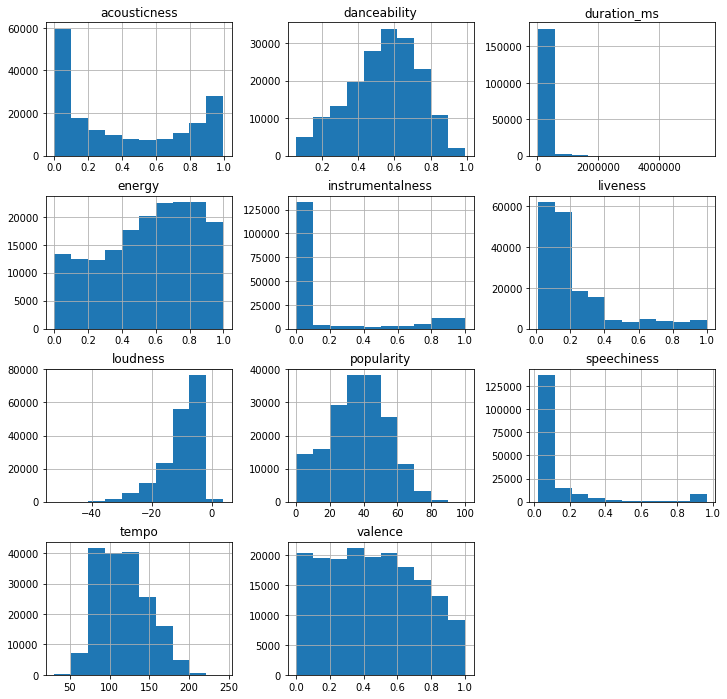

In [5]:
df_dropped.hist(figsize = (12,12));

In [6]:
# normalise - has to be normalization, to put features on the same scale as the dummy variables we'll generate later
dummy_df = pd.get_dummies(df_dropped)
scaler = MinMaxScaler()
scaler.fit(dummy_df)

with open("datafiles/MinMaxScaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

transformed = scaler.transform(dummy_df)
transformed_df = pd.DataFrame(data = transformed, index = dummy_df.index, columns = dummy_df.columns)

In [7]:
transformed_df.head()

popularity  acousticness  danceability  duration_ms    energy  \
0        0.00      0.613454      0.356292     0.015167  0.910909   
1        0.01      0.246988      0.571934     0.022029  0.737732   
2        0.03      0.955823      0.650252     0.027969  0.131113   
3        0.00      0.705823      0.196438     0.024747  0.326313   
4        0.04      0.953815      0.294067     0.012142  0.225209   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  key_F#  \
0          0.000000  0.339614  0.900856     0.032070  0.642704  ...     0.0   
1          0.000000  0.142710  0.834469     0.068374  0.675801  ...     1.0   
2          0.000000  0.094241  0.686429     0.014818  0.325182  ...     0.0   
3          0.000000  0.089697  0.716695     0.018311  0.665238  ...     0.0   
4          0.123123  0.194208  0.557054     0.024767  0.518516  ...     0.0   

   key_G  key_G#  mode_Major  mode_Minor  time_signature_0/4  \
0    0.0     0.0         1.0         0.0                 0.0   
1    0.0     0.0         0.0         1.0                 0.0   
2    0.0     0.0         0.0         1.0                 0.0   
3    0.0     0.0         1.0         0.0                 0.0   
4    0.0     0.0         1.0         0.0                 0.0   

   time_signature_1/4  time_signature_3/4  time_signature_4/4  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   time_signature_5/4  
0                 0.0  
1                 0.0  
2                 1.0  
3                 0.0  
4                 0.0  

[5 rows x 57 columns]

In [8]:
# KNN will find the supplied datapoint as its own nearest neighbour, so we ignore it and return the next 20
recommender = NearestNeighbors(n_neighbors = 21)
recommender.fit(transformed_df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                 radius=1.0)

In [13]:
df[df['artist_name'].str.lower() == "little mix"].head()

genre artist_name                            track_name  \
13665  Dance  Little Mix     Woman Like Me (feat. Nicki Minaj)   
13705  Dance  Little Mix                    Shout Out to My Ex   
14023  Dance  Little Mix                           Black Magic   
14310  Dance  Little Mix                      Secret Love Song   
14792  Dance  Little Mix  Think About Us (feat. Ty Dolla $ign)   

                     track_id  popularity  acousticness  danceability  \
13665  6rrTr2HEAzlpC4KWZxF3S1          84        0.1730         0.757   
13705  1pwo8l3Ko7idwaz4LVUEC4          80        0.0239         0.773   
14023  5y6pj7OeBFF0CVgZKhRbOG          77        0.0348         0.777   
14310  4JIo8RztBbELr2gWJ5OGK6          77        0.2590         0.534   
14792  18n2GdCpsHYzkbMKPavE7Y          78        0.0845         0.511   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
13665       228207   0.849          0.000000   F    0.0878    -3.424  Minor   
13705       246240   0.747          0.000008   F    0.1100    -4.061  Major   
14023       211773   0.895          0.000000   E    0.3170    -4.464  Major   
14310       249813   0.642          0.000000   A    0.2900    -3.971  Major   
14792       234434   0.795          0.000000  G#    0.1020    -3.714  Major   

       speechiness    tempo time_signature  valence  
13665       0.0536  150.036            4/4    0.826  
13705       0.0889  126.014            4/4    0.800  
14023       0.0618  111.987            4/4    0.826  
14310       0.0504   92.963            4/4    0.131  
14792       0.1460  175.987            4/4    0.432

In [14]:
# we need to pull out the features 
song_info, song_name, artist = f.get_song_metrics("5y6pj7OeBFF0CVgZKhRbOG", transformed_df)
recommended_songs = f.get_nearest_neighbours(song_info, df, recommender)

In [15]:
print(f"your recommended songs for {song_name} - {artist} are:")
for song, artist in recommended_songs:
    print(song, "-", artist)

your recommended songs for Black Magic - Little Mix are:
Up All Night - R3HAB
Outside - Calvin Harris
Chasing Highs - ALMA
Till The Sun Comes Up - Firebeatz
El Anillo - Jennifer Lopez
Shining (feat. Beyoncé & Jay-Z) - DJ Khaled
Blow Your Mind (Mwah) - Dua Lipa
A Year Without Rain - Selena Gomez & The Scene
The Gun (feat. Trinidad James, Dev & Chrish) - Cash Cash
Olvídame y Pega la Vuelta - Jennifer Lopez
Gravel To Tempo - Hayley Kiyoko
Candyman - Zedd
TiK ToK - Kesha
Grenade - Bruno Mars
Alone - CID Remix - Halsey
Me equivoque - María José
Talk About It - Mike Perry
The Other Side - Betty Who
On Purpose - Sabrina Carpenter
All the Way Home - Tamar Braxton
